In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')
#Ignore woarnings
import warnings
warnings.filterwarnings('ignore')

# Tech Salaries and Gender: Do women make less money than men?

This is a exploratory project that aims to answer the question of whether women employees make less money than their men counterparts. I will be looking at survey response data from .... , and also dissecting various factors like year of experience, job title and hours per week that might impact salary.

In [2]:
raw_data = pd.read_excel('2019_Data_Professional_Salary_Survey_Responses.xlsx')
raw_data.head()

,"This data is from the 2017/2018/2019 Data Professional Salary Survey. For more details and analysis, visit:",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,https://www.BrentOzar.com/go/salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
3,2017,2017-01-05 05:10:20.451000,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:26:23.388000,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1


In [3]:
#convert float to string
def str_salary(salary):
    sep = '.'
    if type(salary) == int:
        salary = str(salary)
    elif type(salary) == str:
        # Replace characteres and take the cents out of our data
        salary = salary.replace(" ","").replace("$","").replace(",","").split(sep)[0]
    elif type(salary) == float:
        salary = str(salary)
    return salary
raw_data.columns = raw_data.columns.str.replace(" ","_")

In [4]:
df_new = raw_data.rename(columns={'Unnamed:_2': 'SalaryUSD', 'Unnamed:_3': 'Country', 'Unnamed:_9': 'JobTitle', 'Unnamed:_19': 'HoursperWeek', 'Unnamed:_25': 'Gender', 'This_data_is_from_the_2017/2018/2019_Data_Professional_Salary_Survey._For_more_details_and_analysis,_visit:':'Survey_Year', "Unnamed:_11":"YearExp"}, index={'0': 'Row_0'})

In [5]:
df_new = df_new.drop([df_new.index[0] , df_new.index[1]])
df_new.head()

,Survey_Year,Unnamed:_1,SalaryUSD,Country,Unnamed:_4,Unnamed:_5,Unnamed:_6,Unnamed:_7,Unnamed:_8,JobTitle,...,HoursperWeek,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Gender,Unnamed:_26,Unnamed:_27,Unnamed:_28
2,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
3,2017,2017-01-05 05:10:20.451000,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:26:23.388000,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
5,2017,2017-01-05 05:32:57.367000,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
6,2017,2017-01-05 05:33:03.316000,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [6]:
US = df_new.loc[df_new.Country == 'United States',:]


In [7]:
df = US.loc[US.Survey_Year == 2019]
df.head()

,Survey_Year,Unnamed:_1,SalaryUSD,Country,Unnamed:_4,Unnamed:_5,Unnamed:_6,Unnamed:_7,Unnamed:_8,JobTitle,...,HoursperWeek,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Gender,Unnamed:_26,Unnamed:_27,Unnamed:_28
6014,2019,2018-12-06 13:58:01.557000,128500,United States,442,Microsoft SQL Server,15,"Microsoft SQL Server, Oracle",Full time employee,Architect,...,40,"None, or less than 1 day per week",300K-1M (large city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, Projects",1
6016,2019,2018-12-11 06:24:30.227000,110000,United States,43016,Microsoft SQL Server,18,Azure SQL DB,Full time employee,"DBA (Development Focus - tunes queries, indexe...",...,44,"None, or less than 1 day per week",1M+ (metropolis),Private business,No,"Stay with the same employer, same role",Male,DBA (Production Focus - build & troubleshoot s...,"Build scripts & automation tools, Manual tasks...",1
6018,2019,2018-12-11 06:26:28.079000,65000,United States,NaN,Microsoft SQL Server,3,"Microsoft SQL Server, MySQL/MariaDB",Full time employee,Developer: T-SQL,...,45,"None, or less than 1 day per week",100K-299K (city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Manual tasks...",1
6020,2019,2018-12-11 06:30:47.023000,116500,United States,605,Microsoft SQL Server,12,"PostgreSQL, MongoDB, Azure SQL DB",Full time employee of a consulting/contracting...,Architect,...,30,5 or more,1M+ (metropolis),Private business,"Yes, but only passively (just curious)",Prefer not to say,Male,DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",1
6022,2019,2018-12-11 06:33:56.358000,124000,United States,92105,Microsoft SQL Server,18,Oracle,Full time employee,DBA (General - splits time evenly between writ...,...,40,4,1M+ (metropolis),Private business,"Yes, actively looking for something else","Stay with the same role, but change employers",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Projects, R&D",1


In [8]:
df.JobTitle.value_counts()

DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    157
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                   97
Developer: T-SQL                                                                                               61
Architect                                                                                                      50
Analyst                                                                                                        49
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                          48
DBA (Development Focus - tunes queries, indexes, does deployments)                                             40
Manager                                                                                                        36
Developer: App code (C#, JS, etc)                                                       

In [9]:
# look at years of experience
# look at other variables 
# run a/b testing  or t-testing in these

In [10]:
df.SalaryUSD.value_counts()

80000     20
105000    19
125000    18
110000    17
120000    17
          ..
99100      1
61000      1
185000     1
99600      1
71400      1
Name: SalaryUSD, Length: 201, dtype: int64

<AxesSubplot:xlabel='SalaryUSD', ylabel='Density'>

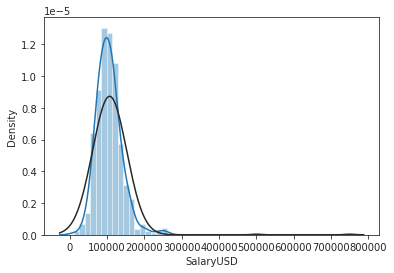

In [11]:
from scipy import stats
df['SalaryUSD'] = df.SalaryUSD.apply(str_salary)
df['SalaryUSD'] = df.SalaryUSD.astype(float)
sns.distplot(df.SalaryUSD, fit = stats.norm)

# Hours per week analysis

<AxesSubplot:xlabel='HoursperWeek', ylabel='Density'>

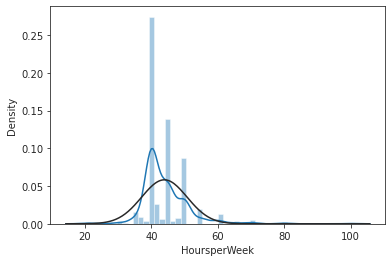

In [12]:
df_non_female = df.loc[df.Gender != 'Female']
df_non_female['HoursperWeek'] = df_non_female.HoursperWeek.astype(float)
sns.distplot(df_non_female.HoursperWeek, fit = stats.norm)

<AxesSubplot:xlabel='HoursperWeek', ylabel='Density'>

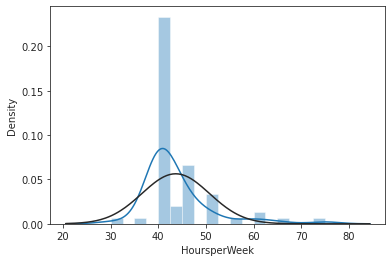

In [13]:
df_fem = df.loc[df.Gender == 'Female']
df_fem['HoursperWeek'] = df_fem.HoursperWeek.astype(float)
sns.distplot(df_fem.HoursperWeek, fit = stats.norm)

<AxesSubplot:xlabel='Gender', ylabel='HoursperWeek'>

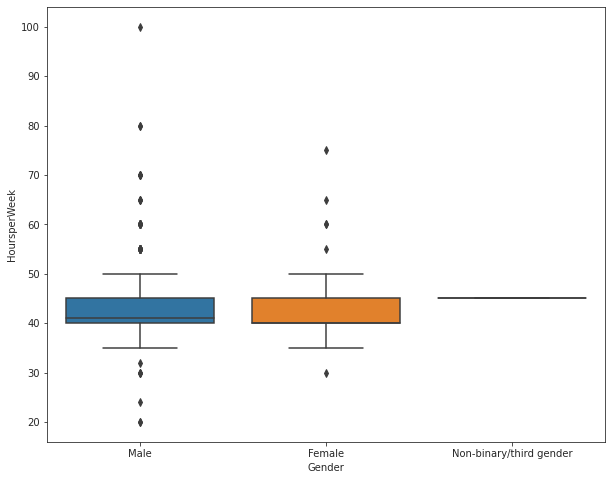

In [14]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'HoursperWeek', data = df)

In [15]:
#Analysis of the hours per week 
df.HoursperWeek.describe()

count     602
unique     25
top        40
freq      268
Name: HoursperWeek, dtype: int64

In [16]:
#Calculate the percentiles - 25 and 75 %
q75, q25 = np.percentile(df.HoursperWeek , [75 ,25])
print(f'Q3:{q75}')
print(f'Q1:{q25}')
# Calculate the percentile Range
iqr = q75 - q25
print(f'Interquartile Range: {iqr}')

Q3:45.0
Q1:40.0
Interquartile Range: 5.0


In [17]:
min_h = df.HoursperWeek.median() - 1.5*iqr
max_h = df.HoursperWeek.median() + 1.5*iqr
print(f'Minimun hours (threshold) : {min_h}')
print(f'Maximun hours (threshold) : {max_h}')

Minimun hours (threshold) : 33.0
Maximun hours (threshold) : 48.0


In [18]:
#data set within the range
df.HoursperWeek = df.HoursperWeek[(df.HoursperWeek>=min_h) & (df.HoursperWeek <= max_h)]
df.head()

,Survey_Year,Unnamed:_1,SalaryUSD,Country,Unnamed:_4,Unnamed:_5,Unnamed:_6,Unnamed:_7,Unnamed:_8,JobTitle,...,HoursperWeek,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Gender,Unnamed:_26,Unnamed:_27,Unnamed:_28
6014,2019,2018-12-06 13:58:01.557000,128500.0,United States,442,Microsoft SQL Server,15,"Microsoft SQL Server, Oracle",Full time employee,Architect,...,40,"None, or less than 1 day per week",300K-1M (large city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, Projects",1
6016,2019,2018-12-11 06:24:30.227000,110000.0,United States,43016,Microsoft SQL Server,18,Azure SQL DB,Full time employee,"DBA (Development Focus - tunes queries, indexe...",...,44,"None, or less than 1 day per week",1M+ (metropolis),Private business,No,"Stay with the same employer, same role",Male,DBA (Production Focus - build & troubleshoot s...,"Build scripts & automation tools, Manual tasks...",1
6018,2019,2018-12-11 06:26:28.079000,65000.0,United States,NaN,Microsoft SQL Server,3,"Microsoft SQL Server, MySQL/MariaDB",Full time employee,Developer: T-SQL,...,45,"None, or less than 1 day per week",100K-299K (city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Manual tasks...",1
6020,2019,2018-12-11 06:30:47.023000,116500.0,United States,605,Microsoft SQL Server,12,"PostgreSQL, MongoDB, Azure SQL DB",Full time employee of a consulting/contracting...,Architect,...,NaN,5 or more,1M+ (metropolis),Private business,"Yes, but only passively (just curious)",Prefer not to say,Male,DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",1
6022,2019,2018-12-11 06:33:56.358000,124000.0,United States,92105,Microsoft SQL Server,18,Oracle,Full time employee,DBA (General - splits time evenly between writ...,...,40,4,1M+ (metropolis),Private business,"Yes, actively looking for something else","Stay with the same role, but change employers",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Projects, R&D",1


<AxesSubplot:xlabel='Gender', ylabel='HoursperWeek'>

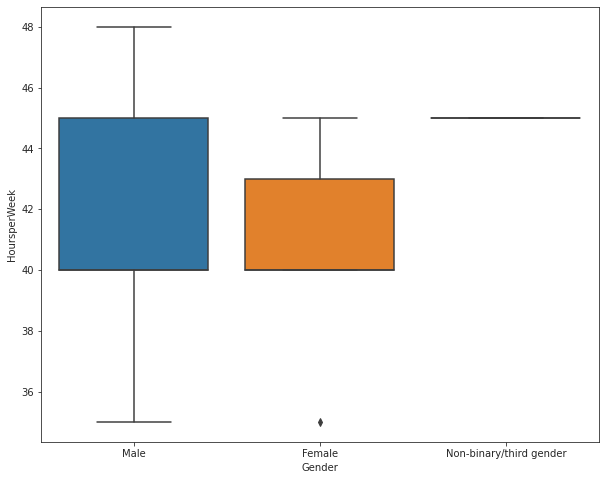

In [19]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'HoursperWeek', data = df)

<AxesSubplot:xlabel='HoursperWeek', ylabel='Density'>

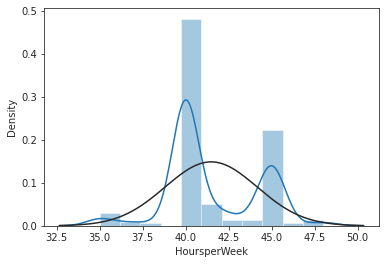

In [20]:
sns.distplot(df.HoursperWeek, fit = stats.norm)

It seems that male workers tend to be working longer hours compared to female workers, and that could be a reason for higher salaries.

<AxesSubplot:xlabel='HoursperWeek', ylabel='SalaryUSD'>

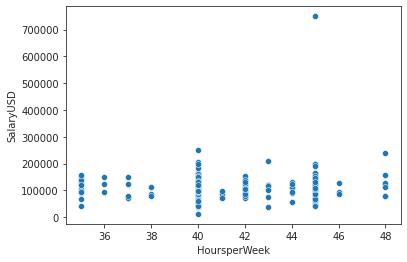

In [21]:
# hours per week vs salary for all genders
df['SalaryUSD'] = df.SalaryUSD.apply(str_salary)
df['SalaryUSD'] = df.SalaryUSD.astype(float)
sns.scatterplot(data = df, x="HoursperWeek", y="SalaryUSD")

<AxesSubplot:xlabel='HoursperWeek', ylabel='SalaryUSD'>

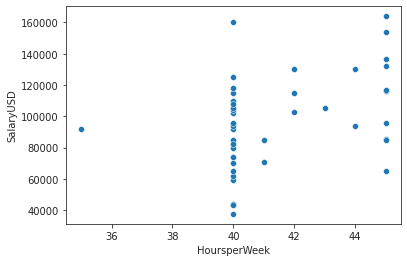

In [22]:
# hours per week vs salary for female workers
df_fem = df[df.Gender == "Female"]
sns.scatterplot(data = df_fem, x="HoursperWeek", y="SalaryUSD")

<AxesSubplot:xlabel='HoursperWeek', ylabel='SalaryUSD'>

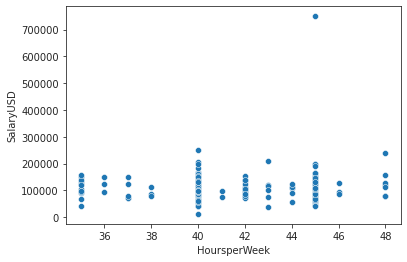

In [23]:
# hours per week vs salary for male workers
df_m = df[df.Gender == "Male"]
sns.scatterplot(data = df_m, x="HoursperWeek", y="SalaryUSD")

In [24]:
#additional analysis for these
round(df_fem.HoursperWeek.describe().to_frame(),3)

,HoursperWeek
count,49
unique,7
top,40
freq,30


In [25]:
round(df_m.HoursperWeek.describe().to_frame(),3)

,HoursperWeek
count,420
unique,12
top,40
freq,238


### Linear Regression models

In [26]:
import numpy as np
male = df_m['HoursperWeek'].astype(float).corr(df_m['SalaryUSD']).astype(float)
female = df_fem['HoursperWeek'].astype(float).corr(df_fem['SalaryUSD']).astype(float)
print(male, female)

0.08742283230596354 0.38733200524227995


### T-testing

### A/B Testing

Interestingly, at first sight it seems like there isn't a linear relation between hours per week and salary for both genders.

# Years of Experience Analysis

<AxesSubplot:xlabel='Gender', ylabel='YearExp'>

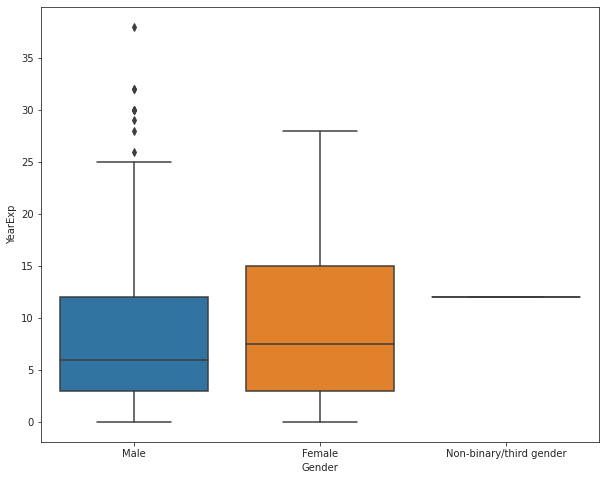

In [27]:
# years of experience vs salaries analysis
fig = plt.figure(figsize = (10,8))
df['YearExp'] = df.YearExp.apply(str_salary)
df['YearExp'] = df.YearExp.astype(float)
sns.boxplot(x = 'Gender', y = 'YearExp', data = df)

<AxesSubplot:xlabel='YearExp', ylabel='SalaryUSD'>

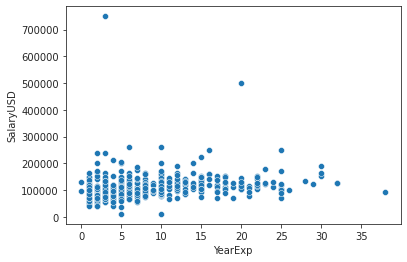

In [28]:
df_m = df[df.Gender == "Male"]
sns.scatterplot(data = df_m, x="YearExp", y="SalaryUSD")

<AxesSubplot:xlabel='YearExp', ylabel='SalaryUSD'>

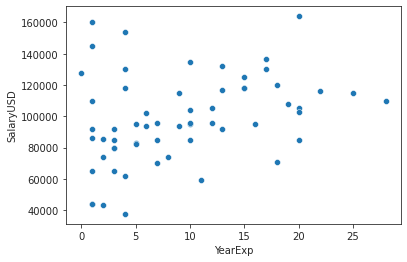

In [29]:
df_m = df[df.Gender == "Female"]
sns.scatterplot(data = df_m, x="YearExp", y="SalaryUSD")

In [30]:
#Salary Analysis

<AxesSubplot:xlabel='Gender', ylabel='SalaryUSD'>

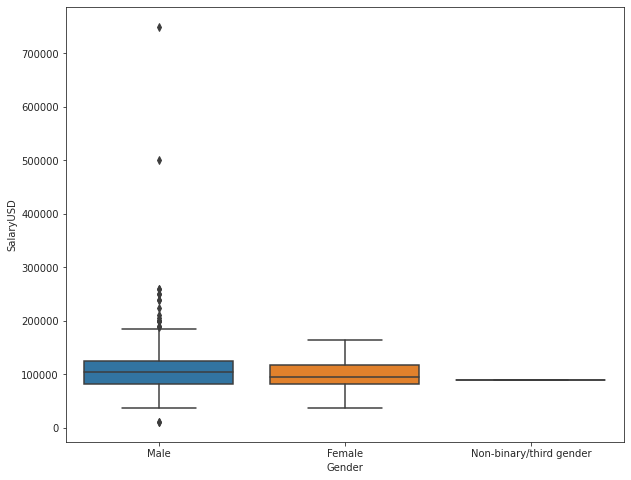

In [31]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'SalaryUSD', data = df)

### Linear Regression Models

In [32]:
male_years = df_m['YearExp'].astype(float).corr(df_m['SalaryUSD']).astype(float)
female_years = df_fem['YearExp'].astype(float).corr(df_fem['SalaryUSD']).astype(float)
print(male, female)

0.08742283230596354 0.38733200524227995


### T-Testing

### A/B Testing

## Outlier Analysis

Now, let's analyse outliers in terms of salary, work hours and years of experience to see what we can learn from them. First, let's look at the number of these outliers.

In [33]:
df_outlier = US[(US.HoursperWeek >= max_h)]
df_outlier.head()

,Survey_Year,Unnamed:_1,SalaryUSD,Country,Unnamed:_4,Unnamed:_5,Unnamed:_6,Unnamed:_7,Unnamed:_8,JobTitle,...,HoursperWeek,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Gender,Unnamed:_26,Unnamed:_27,Unnamed:_28
15,2017,2017-01-05 07:22:44.428000,137500,United States,Not Asked,Microsoft SQL Server,16,"Azure SQL DB, Amazon RDS (any flavor)",Full time employee of a consulting/contracting...,DBA,...,55,5 or more,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
17,2017,2017-01-05 07:35:03.887000,85000,United States,Not Asked,Microsoft SQL Server,8,"MySQL/MariaDB, PostgreSQL, Microsoft Access",Full time employee,DBA,...,50,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
20,2017,2017-01-05 07:36:55.861000,66000,United States,Not Asked,Microsoft SQL Server,10,"Microsoft SQL Server, PostgreSQL, MongoDB, Mic...",Full time employee,"Developer: App code (C#, JS, etc)",...,60,5 or more,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
21,2017,2017-01-05 07:37:20.956000,101750,United States,Not Asked,Microsoft SQL Server,13,Oracle,Full time employee,DBA,...,60,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
24,2017,2017-01-05 07:38:02.941000,78000,United States,Not Asked,Azure SQL DB,5,"Microsoft SQL Server, MongoDB, Microsoft Access",Full time employee,DBA,...,60,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [34]:
US['SalaryUSD'] = US.SalaryUSD.apply(str_salary)
US['SalaryUSD'] = US.SalaryUSD.astype(float)
q75, q25 = np.percentile(US.SalaryUSD , [75 ,25])
print(f'Q3:{q75}')
print(f'Q1:{q25}')
# Calculate the percentile Range
iqr = q75 - q25
print(f'Interquartile Range: {iqr}')
min_salary = US.SalaryUSD.median() - 1.5*iqr
max_salary = US.SalaryUSD.median() + 1.5*iqr
print(f'Minimum salary (threshold) : {min_salary}')
print(f'Maximum salary (threshold) : {max_salary}')

Q3:122000.0
Q1:85000.0
Interquartile Range: 37000.0
Minimum salary (threshold) : 46500.0
Maximum salary (threshold) : 157500.0


In [35]:
US_outliers = US[US.SalaryUSD >= max_salary]
US_outliers.head()

,Survey_Year,Unnamed:_1,SalaryUSD,Country,Unnamed:_4,Unnamed:_5,Unnamed:_6,Unnamed:_7,Unnamed:_8,JobTitle,...,HoursperWeek,Unnamed:_20,Unnamed:_21,Unnamed:_22,Unnamed:_23,Unnamed:_24,Gender,Unnamed:_26,Unnamed:_27,Unnamed:_28
3,2017,2017-01-05 05:10:20.451000,200000.0,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
41,2017,2017-01-05 07:51:56.547000,165000.0,United States,Not Asked,Microsoft SQL Server,18,"MySQL/MariaDB, MongoDB, Cassandra, Azure SQL D...",Independent or freelancer or company owner,DBA,...,40,5 or more,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
42,2017,2017-01-05 07:51:58.846000,200000.0,United States,Not Asked,Microsoft SQL Server,10,"MySQL/MariaDB, PostgreSQL, MongoDB, Cassandra,...",Full time employee,DBA,...,65,"None, or less than 1 day per week",Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
61,2017,2017-01-05 08:03:46.019000,175000.0,United States,Not Asked,Microsoft SQL Server,15,"Microsoft SQL Server, Azure SQL DB",Full time employee,"Developer: App code (C#, JS, etc)",...,35,4,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
94,2017,2017-01-05 08:28:15.224000,200000.0,United States,Not Asked,Microsoft SQL Server,17,NaN,Full time employee,DBA,...,60,1,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1


<AxesSubplot:xlabel='Gender', ylabel='SalaryUSD'>

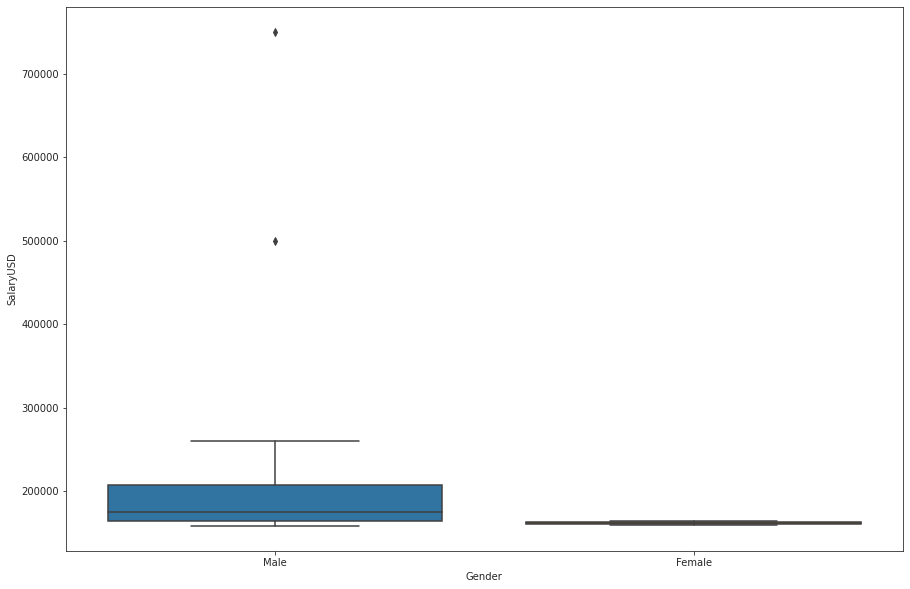

In [36]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x = 'Gender', y = 'SalaryUSD', data = US_outliers[US.Survey_Year == 2019])

<AxesSubplot:xlabel='YearExp', ylabel='SalaryUSD'>

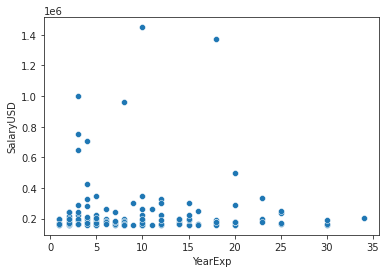

In [37]:
df_outlier_m = US_outliers[US_outliers.Gender == "Male"]
sns.scatterplot(data = df_outlier_m, x = "YearExp", y="SalaryUSD")

<AxesSubplot:xlabel='YearExp', ylabel='SalaryUSD'>

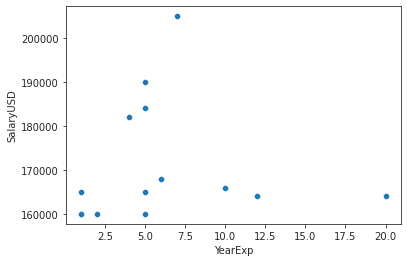

In [38]:
df_outlier_f = US_outliers[US_outliers.Gender == "Female"]
sns.scatterplot(data = df_outlier_f, x = "YearExp", y="SalaryUSD")

Interestingly, there still does not seem to be a linear relationship between years of experience and salaries, while one would think that the two would be related. Let's understand the salary outliers' data a bit more carefully.

In [39]:
round(US_outliers.SalaryUSD.describe().to_frame(),3)

,SalaryUSD
count,261.000
mean,227588.333
std,175692.050
min,158000.000
25%,165000.000
50%,177000.000
75%,205000.000
max,1450000.000


In [40]:
round(US_outliers[US_outliers.Gender == "Female"].SalaryUSD.describe().to_frame(),3)

,SalaryUSD
count,14.000
mean,170928.571
std,13853.432
min,160000.000
25%,161000.000
50%,165000.000
75%,178500.000
max,205000.000


In [41]:
round(US_outliers[US_outliers.Gender == "Male"].SalaryUSD.describe().to_frame(),3)

,SalaryUSD
count,141.000
mean,236342.589
std,191611.517
min,158200.000
25%,164000.000
50%,178000.000
75%,217000.000
max,1450000.000


What I note looking at the data is that there are much more male outliers than female ones, and they also have a higher mean salary, as well as higher maximum and minimum compared to the female outliers.

# Job Title Analysis

In [48]:
US.JobTitle.value_counts()

DBA                                                                                                           976
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    714
Developer: T-SQL                                                                                              435
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  417
Architect                                                                                                     379
Manager                                                                                                       300
Developer: App code (C#, JS, etc)                                                                             294
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                         278
Analyst                                                                                 

In [77]:
df_f = US[US.Gender == "Female"]

In [107]:
result = df_f.groupby(['JobTitle']).aggregate(np.median).reset_index().sort_values('SalaryUSD',ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Architect'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'DBA (Production Focus - build & troubleshoot servers, HA/DR)'),
  Text(5, 0, 'DBA (Development Focus - tunes queries, indexes, does deployments)'),
  Text(6, 0, 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'),
  Text(7, 0, 'Developer: Business Intelligence (SSRS, PowerBI, etc)'),
  Text(8, 0, 'Developer: App code (C#, JS, etc)'),
  Text(9, 0, 'Developer: T-SQL'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Analyst')])

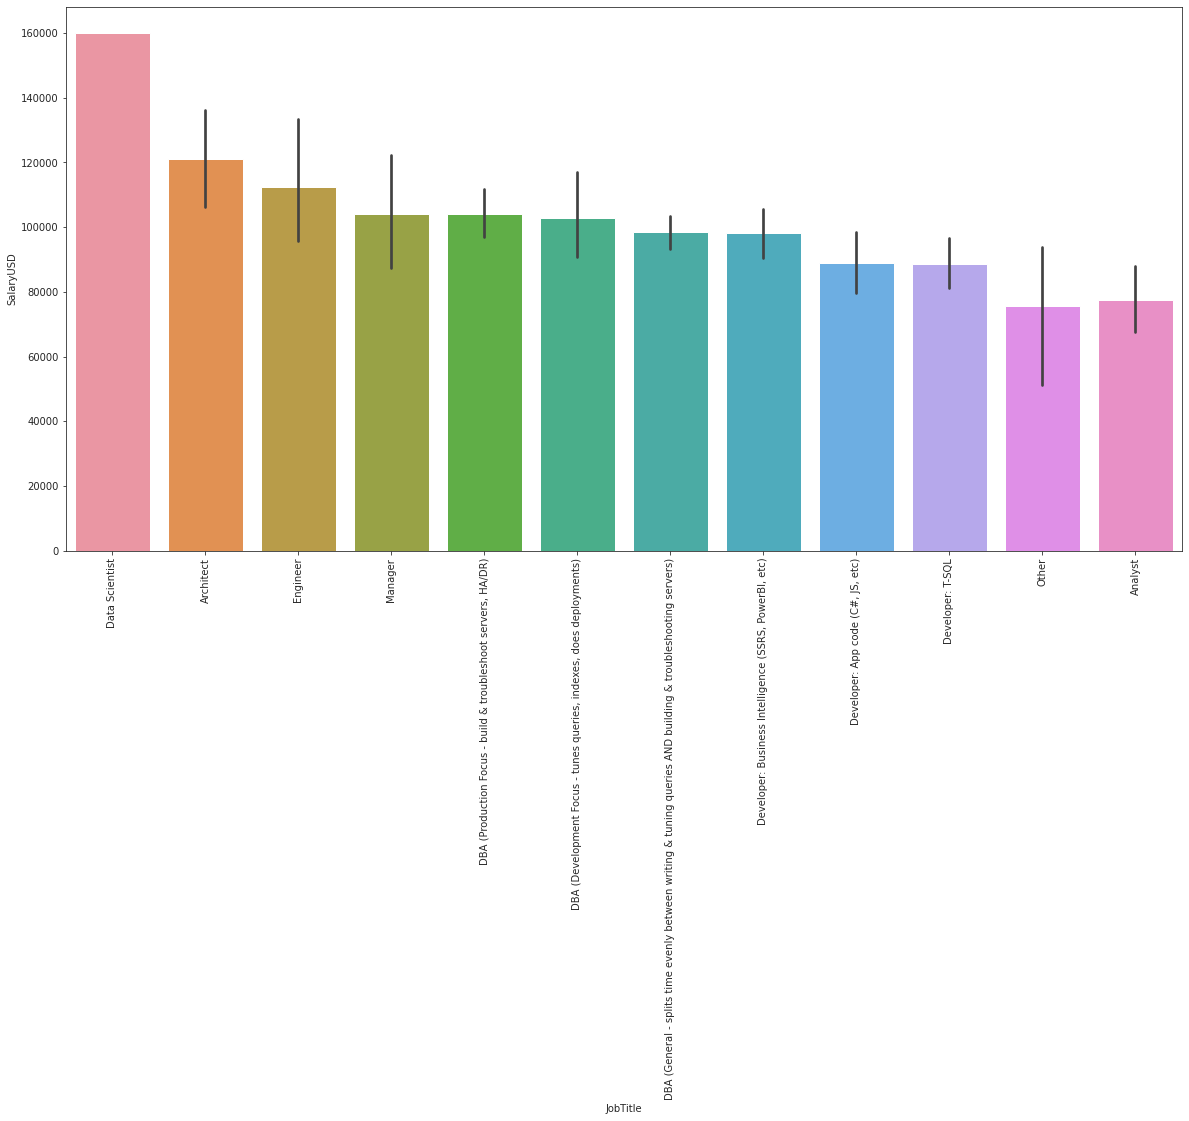

In [106]:
fig = plt.figure(figsize = (20,10))
sns.barplot(x=df_f.JobTitle, y= df_f.SalaryUSD , data=df_f.sort_values(by=['SalaryUSD']), order = result.JobTitle)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Architect'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'DBA (Development Focus - tunes queries, indexes, does deployments)'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'DBA (Production Focus - build & troubleshoot servers, HA/DR)'),
  Text(5, 0, 'Data Scientist'),
  Text(6, 0, 'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)'),
  Text(7, 0, 'Developer: T-SQL'),
  Text(8, 0, 'Developer: Business Intelligence (SSRS, PowerBI, etc)'),
  Text(9, 0, 'Developer: App code (C#, JS, etc)'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Analyst')])

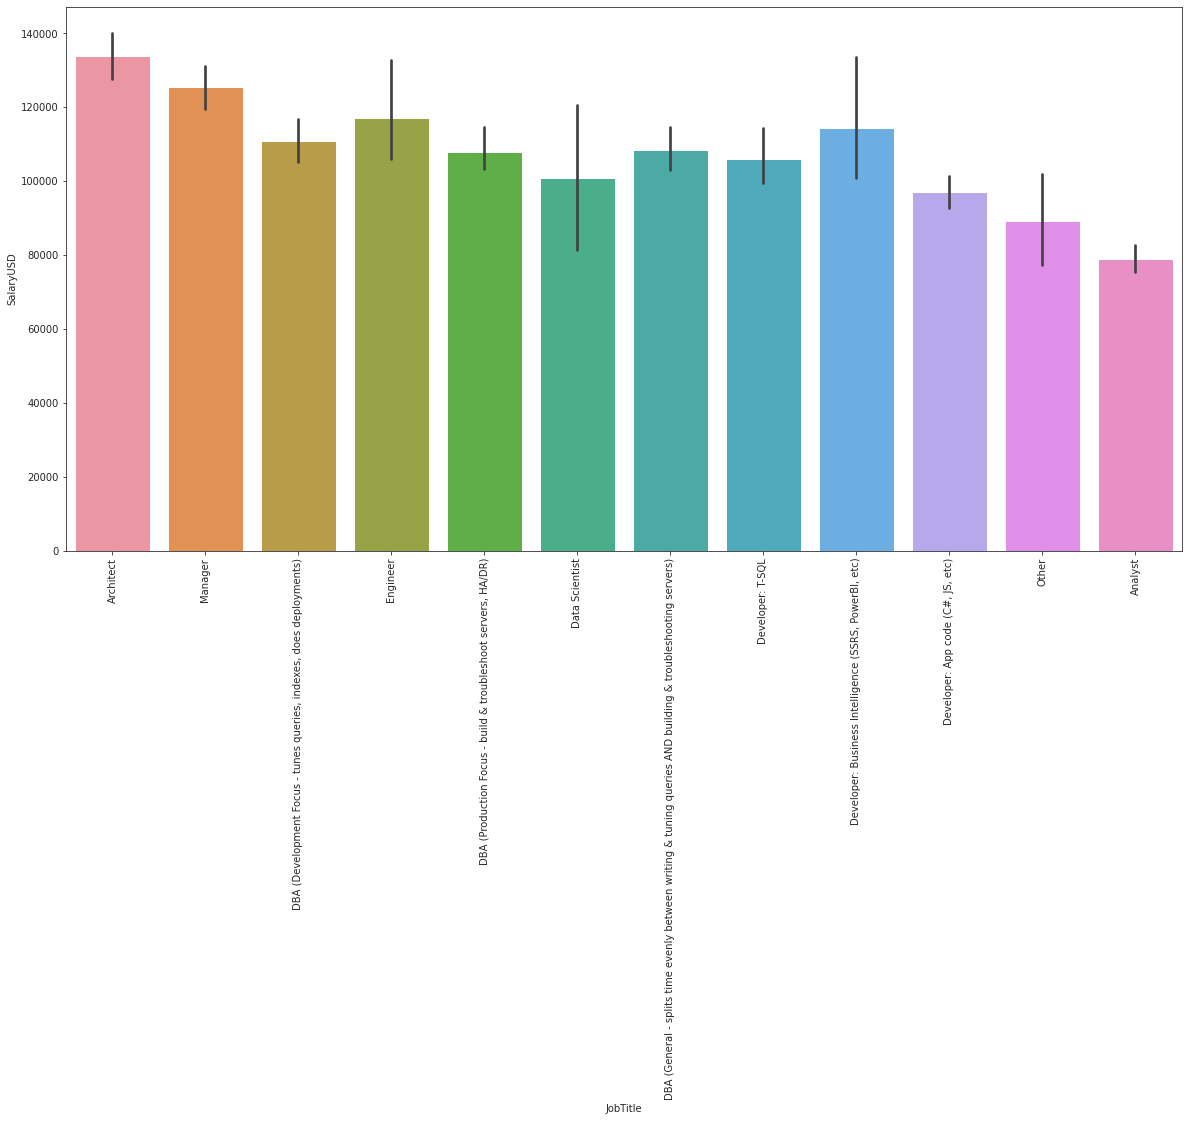

In [109]:
fig = plt.figure(figsize = (20,10))
result_m = US[US.Gender == "Male"].groupby(['JobTitle']).aggregate(np.median).reset_index().sort_values('SalaryUSD',ascending = False)
sns.barplot(x=US[US.Gender == "Male"].JobTitle, y= US[US.Gender == "Male"].SalaryUSD , data=US[US.Gender == "Male"], order = result_m.JobTitle)
plt.xticks(rotation=90)

### Some other testing 

# Country Differences

While most of the data has come from the United States, there might be systematic differences in salary data in other countries. So, let's try and explore them a bit further.

In [42]:
df_new.Country.value_counts()

United States     4509
United Kingdom     667
Canada             244
Australia          185
India              112
                  ... 
Taiwan               1
Uruguay              1
Indonesia            1
Estonia              1
Vietnam              1
Name: Country, Length: 86, dtype: int64

From the function above, it seems like Canada and the United Kindgom are the next countries with the most responses, so let's see what their data suggests in the form of boxplots.

<AxesSubplot:xlabel='Gender', ylabel='HoursperWeek'>

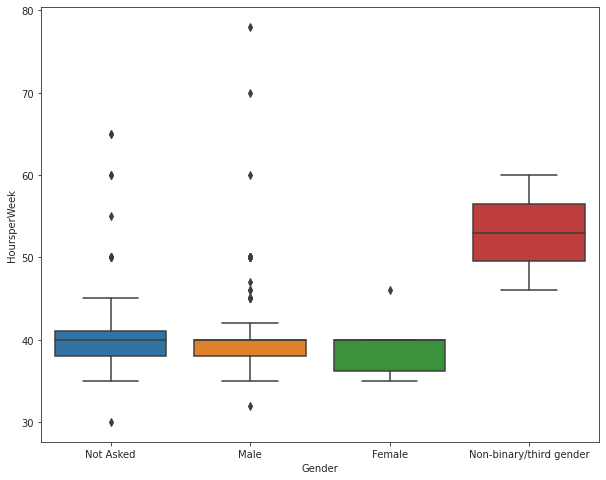

In [43]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'HoursperWeek', data = df_new[df_new.Country == "Canada"])

<AxesSubplot:xlabel='Gender', ylabel='HoursperWeek'>

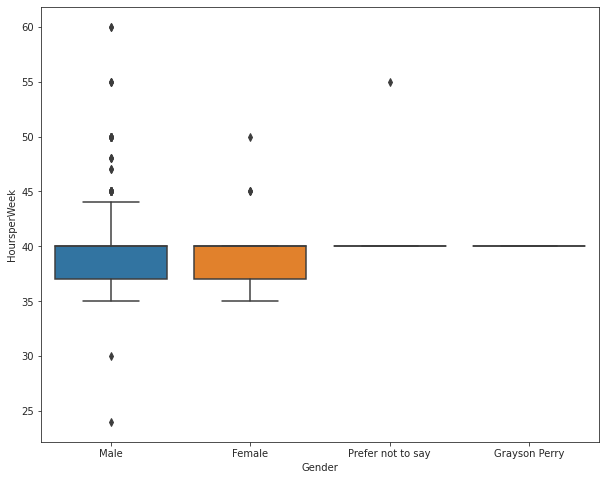

In [47]:
fig = plt.figure(figsize = (10,8))
sns.boxplot(x = 'Gender', y = 'HoursperWeek', data = df_new[df_new.Country == "United Kingdom"][df_new.Gender != "Not Asked"])